# 目的
`particle`モジュールの使用方法を示す。   
基本的にはこのモジュール中の`ensemble_system`を使用する。

In [1]:
import numpy as np
import sys
sys.path.append("../") # path to the directory including the module "particle"

import time

In [2]:
import particle
particle.__version__

'1.1'

## doc()

In [3]:
particle.ensemble_system.doc()

 Class which deal with an ensemble of particles.
    Both `kwargs` for `slicefft` and `ensemble` are necessary for initialization.

    kwargs for slicefft
    -------------------
    kw_slicefft : dict object including the following arguments.
        N      : int
            # of points in x-axis direction
        xmax   : float
            spatial size in x-axis direction
        kwargs : dict
            option (dict object). See `space` and `slicefft` classes.

    kwargs for ensemble
    -------------------
    kw_shapes   : dict object or list of dict objests including the following arguments.
        shape_name : str
            name of shape
        a          : float
            characteristic length of the shape
        kwargs     : dict
            option (dict object). See the classes in `shape` directory.
    
    Other parameters
    ----------------
    kwargs : option
        weighting_density : bool
            if True, then each index of space where particles exist
 

## example

### twinned sphere

In [4]:
### Setting of MSFT
N = 1024; xmax =2048.0; # Real-space size
delta = 1e-4; beta=1e-6; refr = 1 - delta - 1j*beta; # Refractivity
params = dict(Ny=N, zmax=256., Nz=256, ymax=xmax, kmax=0.1212*np.pi, refr=refr)
kw_slicefft = dict(N=N, xmax=xmax, kwargs=params)

### Setting of target
Rs = np.array([100., 30.])
coors = np.array([[0., 0., 0.], [100., 0., 0.]])

# kwargs
infos = [None] * len(Rs)
for ii, _a , _center in zip(range(len(Rs)), Rs, coors):
    infos[ii] = dict(shape_name="sphere", a=_a, kwargs=dict(center=_center))

Elapsed time: 0.69 sec.


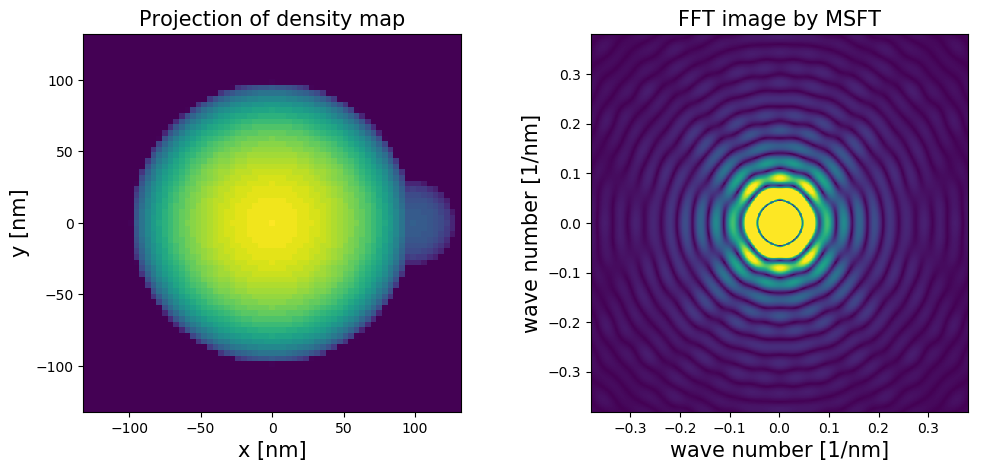

In [5]:
### ensemble_system
st = time.time()
ens1 = particle.ensemble_system(kw_slicefft, infos)
# Execute MSFT
ens1.MSFT(qmode=False, atte=False)
# Plot images
ens1.PlotRhoF(**dict(qcscale=1/25.))
# plt.savefig("../images/image.png", bbox_inches="tight", pad_inches=0.1)
print("Elapsed time: {0:.2f} sec.".format(time.time()-st))
# Save the model
# ens1.save("../data/data.ens")]

#--- End of example ---

### cube

In [6]:
### Setting of MSFT
N = 1024; xmax =2048.0; # Real-space size
delta = 1e-4; beta=1e-6; refr = 1 - delta - 1j*beta; # Refractivity
params = dict(Ny=N, zmax=256., Nz=256, ymax=xmax, kmax=0.1212*np.pi, refr=refr)
kw_slicefft = dict(N=N, xmax=xmax, kwargs=params)

### Setting of target
Rs = np.array([100.])
coors = np.array([[0., 0., 0.]])

# kwargs
infos = [None] * len(Rs)
for ii, _a , _center in zip(range(len(Rs)), Rs, coors):
    infos[ii] = dict(shape_name="cube", a=_a, kwargs=dict(center=_center))

Elapsed time: 0.89 sec.


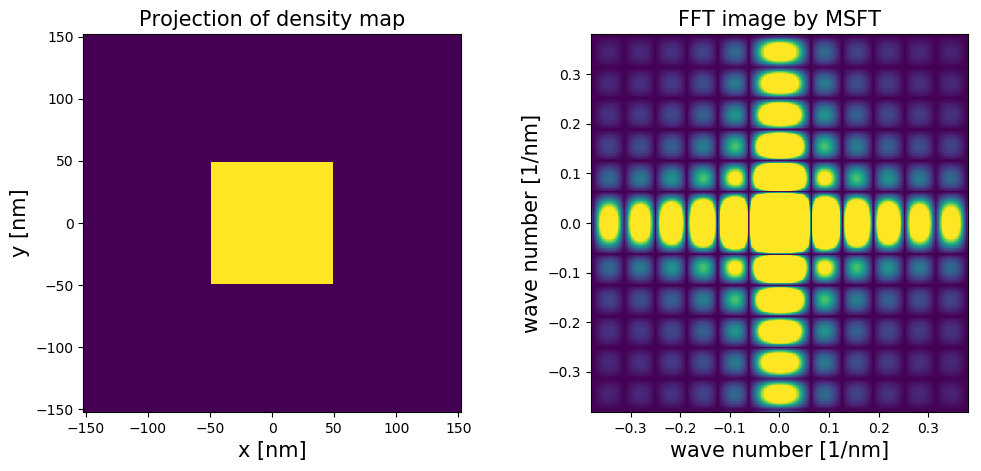

In [7]:
### ensemble_system
st = time.time()
ens1 = particle.ensemble_system(kw_slicefft, infos)
# Execute MSFT
ens1.MSFT(qmode=False, atte=False)
# Plot images
ens1.PlotRhoF(**dict(qcscale=1/25.))
# plt.savefig("../images/image.png", bbox_inches="tight", pad_inches=0.1)
print("Elapsed time: {0:.2f} sec.".format(time.time()-st))
# Save the model
# ens1.save("../data/data.ens")]

#--- End of example ---

### euler rotation

In [8]:
### Setting of MSFT
N = 1024; xmax =2048.0; # Real-space size
delta = 1e-4; beta=1e-6; refr = 1 - delta - 1j*beta; # Refractivity
params = dict(Ny=N, zmax=256., Nz=256, ymax=xmax, kmax=0.1212*np.pi, refr=refr)
kw_slicefft = dict(N=N, xmax=xmax, kwargs=params)

### Setting of target
Rs = np.array([100.])
coors = np.array([[0., 0., 0.]])
eulers = np.array([[45, 45, 0]])

# kwargs
infos = [None] * len(Rs)
for ii, _a , _center, _euler in zip(range(len(Rs)), Rs, coors, eulers):
    infos[ii] = dict(shape_name="cube", a=_a, kwargs=dict(center=_center, euler=_euler))

Elapsed time: 0.69 sec.


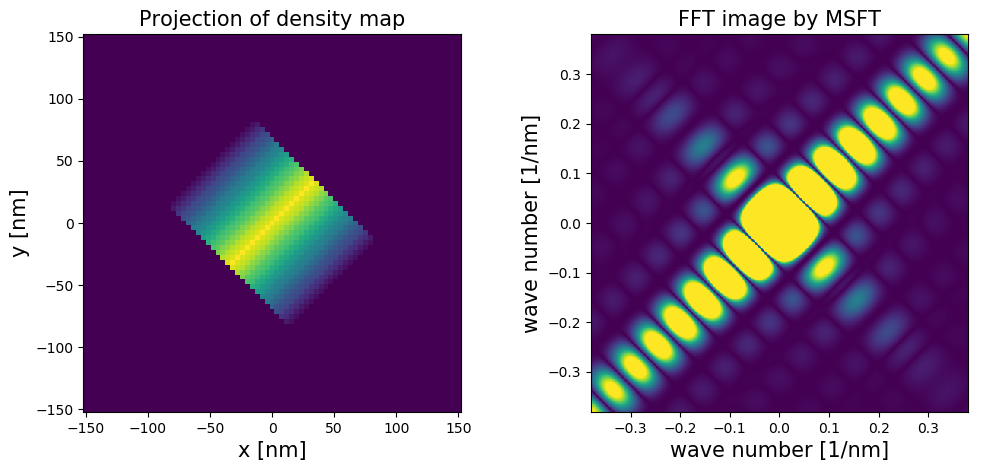

In [9]:
### ensemble_system
st = time.time()
ens1 = particle.ensemble_system(kw_slicefft, infos)
# Execute MSFT
ens1.MSFT(qmode=False, atte=False)
# Plot images
ens1.PlotRhoF(**dict(qcscale=1/25.))
# plt.savefig("../images/image.png", bbox_inches="tight", pad_inches=0.1)
print("Elapsed time: {0:.2f} sec.".format(time.time()-st))
# Save the model
# ens1.save("../data/data.ens")]

#--- End of example ---

## ensemble

In [3]:
### Setting of MSFT
N = 1024; xmax =2048.0; # Real-space size
delta = 1e-4; beta=1e-6; refr = 1 - delta - 1j*beta; # Refractivity
params = dict(Ny=N, zmax=256., Nz=256, ymax=xmax, kmax=0.1212*np.pi, refr=refr)
kw_slicefft = dict(N=N, xmax=xmax, kwargs=params)

### Setting of target
shapes = ["sphere", "cube", "icosahedron"]
Rs = np.array([50., 100, 80])
coors = np.array([[0., 0., 0.], [0., 60., 0.], [45., -100., 0.]])
eulers = np.array([[0, 0, 0], [0, 0, 0], [45, 45, 0]])

# kwargs
infos = [None] * len(Rs)
for ii, _a , _center, _euler, shape in zip(range(len(Rs)), Rs, coors, eulers, shapes):
    infos[ii] = dict(shape_name=shape, a=_a, kwargs=dict(center=_center, euler=_euler))

Elapsed time: 1.47 sec.


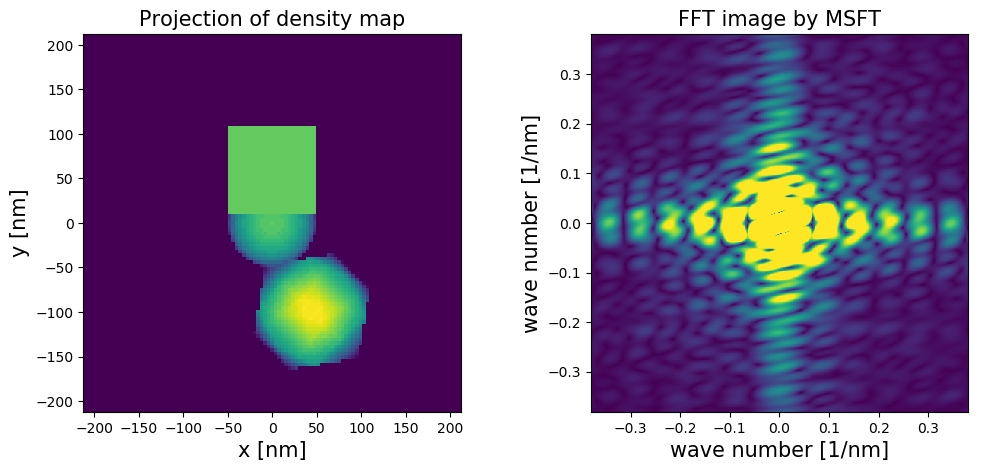

In [14]:
### ensemble_system
st = time.time()
ens1 = particle.ensemble_system(kw_slicefft, infos)
# Execute MSFT
ens1.MSFT(qmode=False, atte=False)
# Plot images
ens1.PlotRhoF(**dict(qcscale=1/25.))
# plt.savefig("../images/image.png", bbox_inches="tight", pad_inches=0.1)
print("Elapsed time: {0:.2f} sec.".format(time.time()-st))
# Save the model
# ens1.save("../data/data.ens")]

#--- End of example ---

## weighning

### example 1: different centers and densities

In [4]:
### Setting of MSFT
N = 1024; xmax =2048.0; # Real-space size
delta = 1e-4; beta=1e-6; refr = 1 - delta - 1j*beta; # Refractivity
params = dict(Ny=N, zmax=256., Nz=256, ymax=xmax, kmax=0.1212*np.pi, refr=refr)
kw_slicefft = dict(N=N, xmax=xmax, kwargs=params)

### Setting of target
shapes = ["cube", "cube"]
Rs = np.array([50., 50])
centers = np.array([[0., 0., 0.], [50., 50., 0.]])
eulers = np.array([[0, 0, 0], [0, 0, 0]])
densities = np.array([1., 2.])

# kwargs
infos = [None] * len(Rs)
for ii, _a , _center, _euler, _shape, _density in zip(range(len(Rs)), Rs, centers, eulers, shapes, densities):
    infos[ii] = dict(shape_name=_shape, a=_a, kwargs=dict(center=_center, euler=_euler, density=_density))

Elapsed time: 0.85 sec.


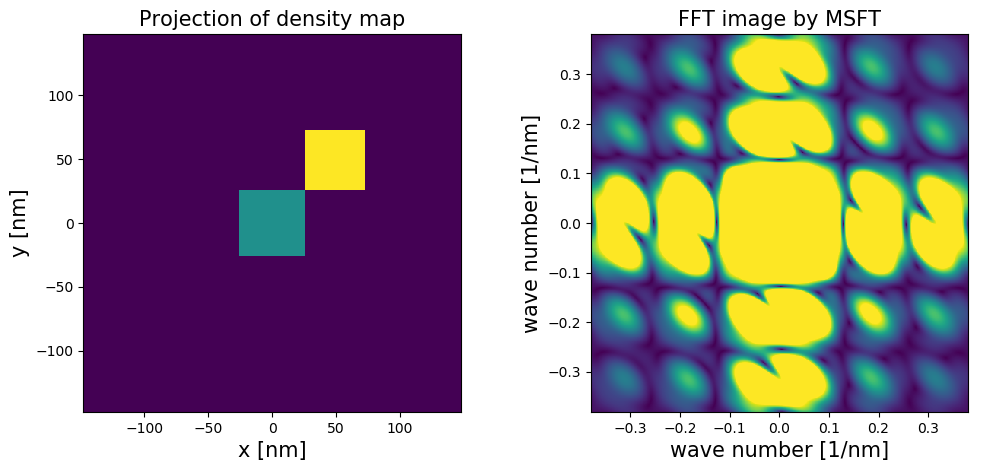

In [5]:
### ensemble_system
st = time.time()
ens1 = particle.ensemble_system(kw_slicefft, infos, weighting_density=True)
# Execute MSFT
ens1.MSFT(qmode=False, atte=False)
# Plot images
ens1.PlotRhoF(**dict(qcscale=1/25.))
# plt.savefig("../images/image.png", bbox_inches="tight", pad_inches=0.1)
print("Elapsed time: {0:.2f} sec.".format(time.time()-st))
# Save the model
# ens1.save("../data/data.ens")]

#--- End of example ---

### example 2: core-shell model of cubic system

In [9]:
### Setting of MSFT
N = 1024; xmax =2048.0; # Real-space size
delta = 1e-4; beta=1e-6; refr = 1 - delta - 1j*beta; # Refractivity
params = dict(Ny=N, zmax=256., Nz=256, ymax=xmax, kmax=0.1212*np.pi, refr=refr)
kw_slicefft = dict(N=N, xmax=xmax, kwargs=params)

### Setting of target
# the order of shapes is crutial in case that weighting mode is True.
shapes = ["cube", "cube"]
Rs = np.array([100., 50])
centers = np.array([[0., 0., 0.], [0., 0., 0.]])
eulers = np.array([[0, 0, 0], [0, 0, 0]])
densities = np.array([1., 2.])

# kwargs
infos = [None] * len(Rs)
for ii, _a , _center, _euler, _shape, _density in zip(range(len(Rs)), Rs, centers, eulers, shapes, densities):
    infos[ii] = dict(shape_name=_shape, a=_a, kwargs=dict(center=_center, euler=_euler, density=_density))

Elapsed time: 0.76 sec.


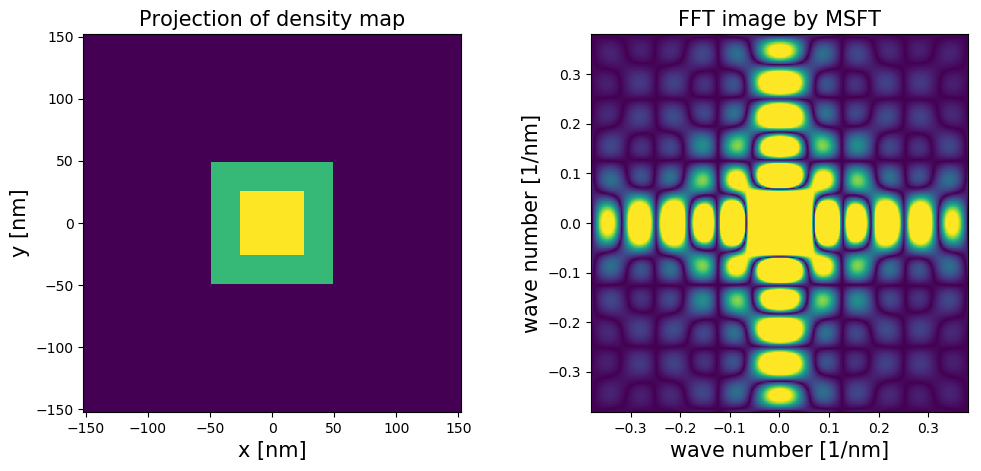

In [11]:
### ensemble_system
st = time.time()
ens1 = particle.ensemble_system(kw_slicefft, infos, weighting_density=True)
# Execute MSFT
ens1.MSFT(qmode=False, atte=False)
# Plot images
ens1.PlotRhoF(**dict(qcscale=1/25.))
# plt.savefig("../images/image.png", bbox_inches="tight", pad_inches=0.1)
print("Elapsed time: {0:.2f} sec.".format(time.time()-st))
# Save the model
# ens1.save("../data/data.ens")]

#--- End of example ---

### example 3: core-shell model of cubic system 2

In [13]:
### Setting of MSFT
N = 1024; xmax =2048.0; # Real-space size
delta = 1e-4; beta=1e-6; refr = 1 - delta - 1j*beta; # Refractivity
params = dict(Ny=N, zmax=256., Nz=256, ymax=xmax, kmax=0.1212*np.pi, refr=refr)
kw_slicefft = dict(N=N, xmax=xmax, kwargs=params)

### Setting of target
# the order of shapes is crutial in case that weighting mode is True.
shapes = ["cube", "cube"]
Rs = np.array([100., 50])
centers = np.array([[0., 0., 0.], [0., 0., 0.]])
eulers = np.array([[0, 0, 0], [45, 45, 45]])
densities = np.array([1., 2.])

# kwargs
infos = [None] * len(Rs)
for ii, _a , _center, _euler, _shape, _density in zip(range(len(Rs)), Rs, centers, eulers, shapes, densities):
    infos[ii] = dict(shape_name=_shape, a=_a, kwargs=dict(center=_center, euler=_euler, density=_density))

Elapsed time: 1.07 sec.


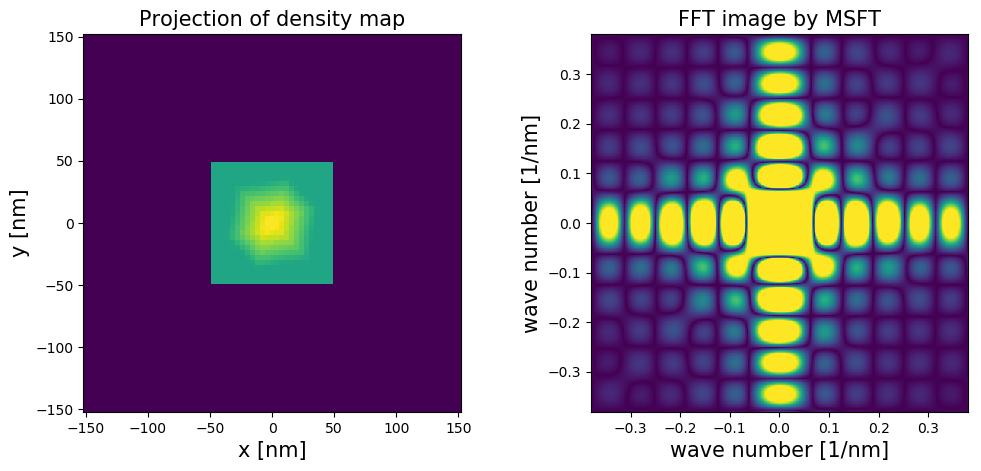

In [14]:
### ensemble_system
st = time.time()
ens1 = particle.ensemble_system(kw_slicefft, infos, weighting_density=True)
# Execute MSFT
ens1.MSFT(qmode=False, atte=False)
# Plot images
ens1.PlotRhoF(**dict(qcscale=1/25.))
# plt.savefig("../images/image.png", bbox_inches="tight", pad_inches=0.1)
print("Elapsed time: {0:.2f} sec.".format(time.time()-st))
# Save the model
# ens1.save("../data/data.ens")]

#--- End of example ---

### example 4: core-shell model of spherical particle

In [5]:
### Setting of MSFT
N = 1024; xmax =2048.0; # Real-space size
delta = 1e-4; beta=1e-6; refr = 1 - delta - 1j*beta; # Refractivity
params = dict(Ny=N, zmax=256., Nz=256, ymax=xmax, kmax=0.1212*np.pi, refr=refr)
kw_slicefft = dict(N=N, xmax=xmax, kwargs=params)

### Setting of target
# the order of shapes is crutial in case that weighting mode is True.
shapes = ["sphere", "sphere"]
Rs = np.array([100., 50])
centers = np.array([[0., 0., 0.], [0., 0., 0.]])
densities = np.array([1., 2.])

# kwargs
infos = [None] * len(Rs)
for ii, _a , _center, _shape, _density in zip(range(len(Rs)), Rs, centers, shapes, densities):
    infos[ii] = dict(shape_name=_shape, a=_a, kwargs=dict(center=_center, density=_density))

Elapsed time: 0.53 sec.


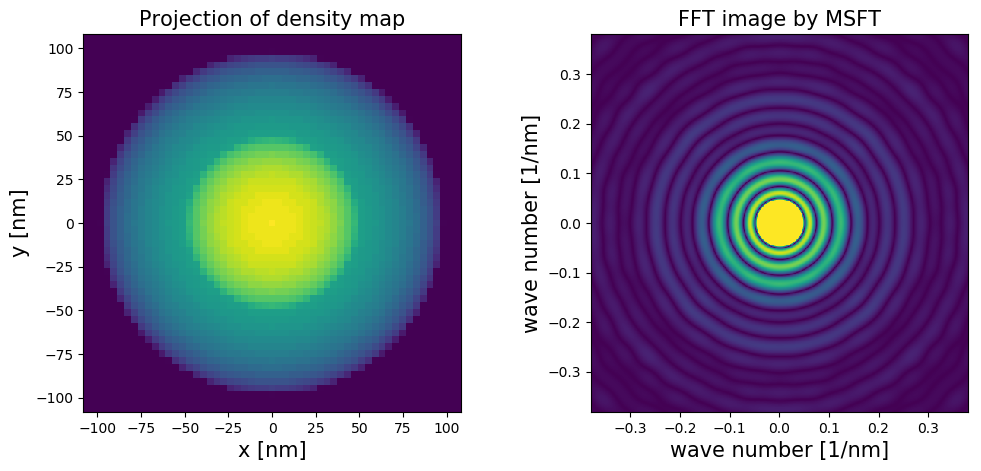

In [6]:
### ensemble_system
st = time.time()
ens1 = particle.ensemble_system(kw_slicefft, infos, weighting_density=True)
# Execute MSFT
ens1.MSFT(qmode=False, atte=False)
# Plot images
ens1.PlotRhoF(**dict(qcscale=1/25.))
# plt.savefig("../images/image.png", bbox_inches="tight", pad_inches=0.1)
print("Elapsed time: {0:.2f} sec.".format(time.time()-st))
# Save the model
# ens1.save("../data/data.ens")]

#--- End of example ---